In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import seaborn as sns

In [2]:
init_notebook_mode(connected = True)

In [3]:
cf.go_offline()

In [4]:
df = pd.read_csv('car_data_set')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

## Data Cleaning

 ploting the missing values in each column using heatmaps

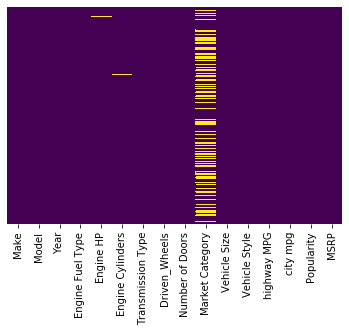

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The above plot shows that the column 'Market Category' has many missing data and we can make any predicitions on the data so we can drop the whole column 

In [10]:
df.drop('Market Category',axis=1,inplace=True)

Missing values are very less in the dataset so we can just drop the values.

In [11]:
df.dropna(axis=0,inplace =True)

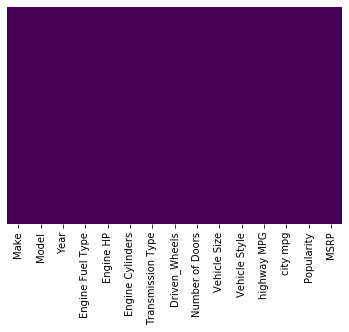

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

changing column names

In [13]:
df.rename(columns={'Engine HP': 'HP','Engine Cylinders':'Cylinders',
                   'highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price',
                   'Transmission Type':'Transmission','Driven_Wheels':'Drive Mode'},inplace=True)
df.head()

Make       Model  Year             Engine Fuel Type     HP  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   

  Transmission        Drive Mode  Number of Doors Vehicle Size Vehicle Style  \
0       MANUAL  rear wheel drive              2.0      Compact         Coupe   
1       MANUAL  rear wheel drive              2.0      Compact   Convertible   
2       MANUAL  rear wheel drive              2.0      Compact         Coupe   
3       MANUAL  rear wheel drive              2.0      Compact         Coupe   
4       MANUAL  rear wheel drive              2.0      Compact   Convertible   

   MPG-H  MPG-C  Popularity  Price  
0     26     19        3916  46135  
1     28     19        3916  40650  
2     28     20        3916  36350  
3     28     18        3916  29450  
4     28     18        3916  34500

## checking for outliners

In [14]:
df.iplot(kind='box',theme='solar')

the above box plot shows there are not many outliners in the data.So, the data can be fed into our machine learning model.

## EDA

In [15]:
print('The following car brands that are represented in the data set : ')
print('\n')
print(df['Make'].unique())

The following car brands that are represented in the data set : 


['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Bugatti']


#### there are around 48 brands that are represented in the dataset

In [16]:
df3 = df.groupby('Make').mean()

The average price of top 5 brands is as follows.

In [17]:
df3 = df3.sort_values(by=['Popularity'],ascending=False).drop(['Year','HP','Cylinders','Number of Doors','MPG-H','MPG-C'],axis='columns')

In [18]:
df3.iloc[0:5]

Popularity          Price
Make                              
Ford         5657.0   28522.862069
BMW          3916.0   62162.558642
Audi         3105.0   54574.121495
Ferrari      2774.0  237383.823529
Honda        2202.0   26608.883991

### Correlation Matrix

In [19]:
df.corr()

Year        HP  Cylinders  Number of Doors     MPG-H  \
Year             1.000000  0.337297  -0.026670         0.246173  0.265597   
HP               0.337297  1.000000   0.788319        -0.128493 -0.423734   
Cylinders       -0.026670  0.788319   1.000000        -0.147591 -0.614703   
Number of Doors  0.246173 -0.128493  -0.147591         1.000000  0.116920   
MPG-H            0.265597 -0.423734  -0.614703         0.116920  1.000000   
MPG-C            0.220053 -0.474810  -0.634460         0.137386  0.842834   
Popularity       0.086580  0.041418   0.042705        -0.058979 -0.024927   
Price            0.209353  0.658983   0.551988        -0.145600 -0.207774   

                    MPG-C  Popularity     Price  
Year             0.220053    0.086580  0.209353  
HP              -0.474810    0.041418  0.658983  
Cylinders       -0.634460    0.042705  0.551988  
Number of Doors  0.137386   -0.058979 -0.145600  
MPG-H            0.842834   -0.024927 -0.207774  
MPG-C            1.000000   -0.007238 -0.232699  
Popularity      -0.007238    1.000000 -0.048490  
Price           -0.232699   -0.048490  1.000000

In [20]:
df.corr().iplot(kind='heatmap',xTitle='correlation matrix')

- from the above matrix we can conclude that the target variable 'Price' is highly co-related with HP and less corelated with MPG-C feature.
- we can also conclude that engine HP and cylinders have high corelation
- the MPG-H is anti-corelated with cylinders of the engine

lets see how my price is distributed

In [21]:
df['Price'].iplot(kind='hist',xrange=[0,400000],xTitle='Distribution of price',theme='solar')

the prices of most of the car brand ranges from 5k to 100k

lets check how the average price of cars was distibuted over the past years

In [22]:
df.iplot(kind='bar',x='Year',y='Price',xTitle='Year',yTitle='Prices',theme='solar')

As we see the prices were less during 1990-2000 and there was a drastic increase in the price during past 10 years

lets see how the prices depened on HP and MCG-C features from the data set

In [23]:
df.iplot(kind='scatter',x='Price',y='HP',secondary_y='MPG-C',xTitle="Prices",
         yTitle='Engine HP',secondary_y_title='MPG-C',theme='solar',mode='markers')

from the above plot we can conclude that the car which has high HP and price will have a less MPG-c(milage in city)

In [38]:
count={}
for year in df['Year'].unique():
    count[year]=0
    for i in df['Year']:
        if i==year:
            count[year]+=1
        else:
            continue
df3 = pd.DataFrame(count,index=["count"])
df3 = df3.transpose()

df3.head()

count
2011    279
2012    350
2013    322
1992    127
1993    159

In [37]:

df3.iplot(kind='bar',xTitle='Year',yTitle='number of cars sold',theme='solar')

Very few cars were sold during the period of 1990-2000

In [623]:
df.head()

Make       Model  Year             Engine Fuel Type     HP  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   

  Transmission        Drive Mode  Number of Doors Vehicle Size Vehicle Style  \
0       MANUAL  rear wheel drive              2.0      Compact         Coupe   
1       MANUAL  rear wheel drive              2.0      Compact   Convertible   
2       MANUAL  rear wheel drive              2.0      Compact         Coupe   
3       MANUAL  rear wheel drive              2.0      Compact         Coupe   
4       MANUAL  rear wheel drive              2.0      Compact   Convertible   

   MPG-H  MPG-C  Popularity  Price  values  
0     26     19        3916  46135       0  
1     28     19        3916  40650       1  
2     28     20        3916  36350       2  
3     28     18        3916  29450       3  
4     28     18        3916  34500       4

we can drop the columns <font color=red> ['Model' , 'Engine Fuel Type' , 'Transmission' , 'Drive mode' , 'Vehicle Size' , 'Vehicle Style', 'values' ]  </font>

because they are in the string format type and any useful features can't be extracted for this regression type of probelm.

In [624]:
df.drop(['Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style','values'],axis=1,inplace=True)

In [563]:
df.head()

Make  Year     HP  Cylinders  Number of Doors  MPG-H  MPG-C  Popularity  \
0  BMW  2011  335.0        6.0              2.0     26     19        3916   
1  BMW  2011  300.0        6.0              2.0     28     19        3916   
2  BMW  2011  300.0        6.0              2.0     28     20        3916   
3  BMW  2011  230.0        6.0              2.0     28     18        3916   
4  BMW  2011  230.0        6.0              2.0     28     18        3916   

   Price  
0  46135  
1  40650  
2  36350  
3  29450  
4  34500

## Training the machine learning model

### spliting training and testing data

In [485]:
x = df.drop(['Make','Price'],axis = 1)
y = df['Price']

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

### using decision tree 

In [488]:
from sklearn import tree

In [489]:
model = tree.DecisionTreeRegressor(max_depth=7)

In [490]:
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [491]:
predictions = model.predict(x_test)

In [492]:
from sklearn import metrics

In [493]:
metrics.mean_absolute_error(y_test,predictions)

8248.766126905699

In [494]:
metrics.r2_score(y_test,predictions)

0.5648654873780088

### using Random forest

In [510]:
from sklearn import ensemble

In [511]:
rfr = ensemble.RandomForestRegressor(max_depth=7)

In [512]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [513]:
prediction_rfr = rfr.predict(x_test)

In [514]:
metrics.mean_absolute_error(y_test,prediction_rfr)

7478.545331983259

In [515]:
metrics.r2_score(y_test,prediction_rfr)

0.767274173299245

## using bayesian regression

In [495]:
from sklearn.linear_model import BayesianRidge 

In [496]:
model2 = BayesianRidge()

In [497]:
model2.fit(x_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [498]:
predictions2 = model2.predict(x_test)

In [499]:
metrics.mean_absolute_error(y_test,predictions2)

19756.178737773636

In [500]:
metrics.r2_score(y_test,predictions2)

0.594096283293684

### using ridge regression

In [501]:
from sklearn import linear_model

In [502]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [503]:
reg = linear_model.RidgeCV(alphas=alphas)

In [504]:
reg.fit(x_train,y_train)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [505]:
reg.alpha_

0.7

In [506]:
prediction = reg.predict(x_test)

In [507]:
metrics.mean_absolute_error(y_test,prediction)

19775.038046823964

In [508]:
metrics.r2_score(y_test,predictions2)

0.594096283293684